# Forecasting the annual water usage in Baltimore.
### Urvi Vaidya - Time Series Case Study

In [1]:
# we start with importing the necessary libraries
import pandas as pd
import numpy
import matplotlib.pyplot as pyplot
import sklearn
import scipy
from sklearn.metrics import mean_squared_error
from math import sqrt
from statsmodels.tsa.stattools import adfuller
from pandas import read_csv
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.arima.model import ARIMAResults
import warnings as w
w.filterwarnings('ignore')

In [2]:
file = r'~/Downloads/PGD Sem 2- Time Series Case study/yearly_water_usage.csv'


In [3]:
# we want to read it into a series and not dataframe
series = pd.read_csv(file, header = 0, index_col = 0, parse_dates = True, squeeze = True)


### Splitting the dataset for validation

In [4]:
# split into a training and validation dataset
split_point = len(series) - 10
dataset, validation = series[0:split_point], series[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_csv('dataset.csv')
validation.to_csv('validation.csv')

Dataset 69, Validation 10


In [5]:
# evaluate a persistence model
# load data
series = pd.read_csv('dataset.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
# prepare data
X = series.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
	# predict
	yhat = history[-1]
	predictions.append(yhat)
	# observation
	obs = test[i]
	history.append(obs)
	print('>Predicted=%.3f, Expected=%3.f' % (yhat, obs))
# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)

>Predicted=503.000, Expected=503
>Predicted=503.000, Expected=503
>Predicted=503.000, Expected=515
>Predicted=515.000, Expected=522
>Predicted=522.000, Expected=492
>Predicted=492.000, Expected=503
>Predicted=503.000, Expected=503
>Predicted=503.000, Expected=450
>Predicted=450.000, Expected=432
>Predicted=432.000, Expected=432
>Predicted=432.000, Expected=458
>Predicted=458.000, Expected=462
>Predicted=462.000, Expected=503
>Predicted=503.000, Expected=488
>Predicted=488.000, Expected=466
>Predicted=466.000, Expected=492
>Predicted=492.000, Expected=503
>Predicted=503.000, Expected=515
>Predicted=515.000, Expected=500
>Predicted=500.000, Expected=522
>Predicted=522.000, Expected=575
>Predicted=575.000, Expected=583
>Predicted=583.000, Expected=587
>Predicted=587.000, Expected=628
>Predicted=628.000, Expected=640
>Predicted=640.000, Expected=609
>Predicted=609.000, Expected=606
>Predicted=606.000, Expected=632
>Predicted=632.000, Expected=617
>Predicted=617.000, Expected=613
>Predicted

In [6]:
# summary statistics of time series
print(series.describe())

count     69.000000
mean     500.478261
std       73.901685
min      344.000000
25%      458.000000
50%      492.000000
75%      538.000000
max      662.000000
Name: Water, dtype: float64


### Line Plot

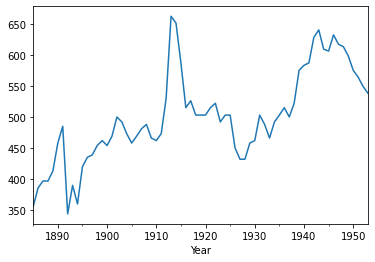

In [7]:
series.plot()
pyplot.show()

### Density Plot

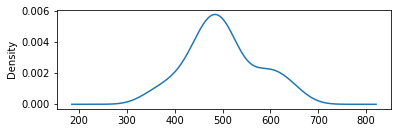

In [8]:
pyplot.subplot(212)
series.plot(kind='kde')
pyplot.show()

### Box and Whisker Plots

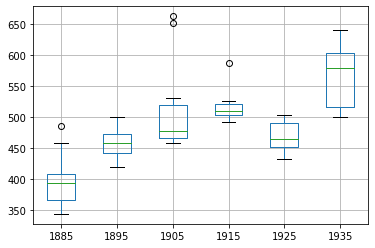

In [9]:
# boxplots of time series
groups = series.groupby(pd.Grouper(freq='10YS'))
decades = pd.DataFrame()
for name, group in groups:
	if len(group.values) is 10:
		decades[name.year] = group.values
decades.boxplot()
pyplot.show()

ADF Statistic: -6.126719
p-value: 0.000000
Critical Values:
	1%: -3.534
	5%: -2.906
	10%: -2.591


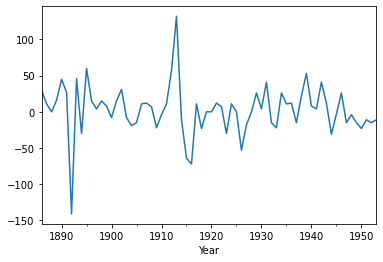

In [10]:
# create a differenced series
def difference(dataset):
	diff = list()
	for i in range(1, len(dataset)):
		value = dataset[i] - dataset[i - 1]
		diff.append(value)
	return pd.Series(diff)

X = series.values
X = X.astype('float32')
# difference data
stationary = difference(X)
stationary.index = series.index[1:]
# check if stationary
result = adfuller(stationary)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))
# plot differenced data
stationary.plot()
pyplot.show()
# save
stationary.to_csv('stationary.csv')

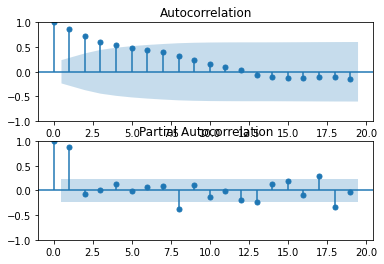

In [11]:
pyplot.figure()
pyplot.subplot(211)
plot_acf(series, ax=pyplot.gca())
pyplot.subplot(212)
plot_pacf(series, ax=pyplot.gca())
pyplot.show()

In [15]:
# load data
series = pd.read_csv('dataset.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
# prepare data
X = series.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    # predict
    model = ARIMA(history, order=(4,1,1))
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]
    predictions.append(yhat)
    # observation
    obs = test[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))
# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)


>Predicted=530.101, Expected=503.000
>Predicted=511.154, Expected=503.000
>Predicted=515.637, Expected=515.000
>Predicted=520.904, Expected=522.000
>Predicted=525.009, Expected=492.000
>Predicted=492.360, Expected=503.000
>Predicted=504.664, Expected=503.000
>Predicted=512.082, Expected=450.000
>Predicted=454.312, Expected=432.000
>Predicted=441.329, Expected=432.000
>Predicted=452.418, Expected=458.000
>Predicted=470.223, Expected=462.000
>Predicted=465.860, Expected=503.000
>Predicted=498.112, Expected=488.000
>Predicted=483.399, Expected=466.000
>Predicted=455.128, Expected=492.000
>Predicted=492.320, Expected=503.000
>Predicted=503.711, Expected=515.000
>Predicted=505.815, Expected=500.000
>Predicted=493.165, Expected=522.000
>Predicted=515.482, Expected=575.000
>Predicted=571.332, Expected=583.000
>Predicted=568.102, Expected=587.000
>Predicted=567.410, Expected=628.000
>Predicted=620.638, Expected=640.000
>Predicted=632.546, Expected=609.000
>Predicted=594.338, Expected=606.000
>

In [16]:
# grid search ARIMA parameters for a time series
# evaluate an ARIMA model for a given order (p,d,q) and return RMSE
def evaluate_arima_model(X, arima_order):
	# prepare training dataset
	X = X.astype('float32')
	train_size = int(len(X) * 0.50)
	train, test = X[0:train_size], X[train_size:]
	history = [x for x in train]
	# make predictions
	predictions = list()
	for t in range(len(test)):
		model = ARIMA(history, order=arima_order)
		model_fit = model.fit()
		yhat = model_fit.forecast()[0]
		predictions.append(yhat)
		history.append(test[t])
	# calculate out of sample error
	rmse = sqrt(mean_squared_error(test, predictions))
	return rmse

# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
	dataset = dataset.astype('float32')
	best_score, best_cfg = float("inf"), None
	for p in p_values:
		for d in d_values:
			for q in q_values:
				order = (p,d,q)
				try:
					rmse = evaluate_arima_model(dataset, order)
					if rmse < best_score:
						best_score, best_cfg = rmse, order
					print('ARIMA%s RMSE=%.3f' % (order,rmse))
				except:
					continue
	print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))


# evaluate parameters
p_values = range(0, 5)
d_values = range(0, 3)
q_values = range(0, 5)

evaluate_models(series.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=76.755
ARIMA(0, 0, 1) RMSE=47.347
ARIMA(0, 0, 2) RMSE=36.030
ARIMA(0, 0, 3) RMSE=32.537
ARIMA(0, 0, 4) RMSE=29.528
ARIMA(0, 1, 0) RMSE=21.975
ARIMA(0, 1, 1) RMSE=21.907
ARIMA(0, 1, 2) RMSE=22.178
ARIMA(0, 1, 3) RMSE=24.731
ARIMA(0, 1, 4) RMSE=24.844
ARIMA(0, 2, 0) RMSE=28.992
ARIMA(0, 2, 1) RMSE=22.314
ARIMA(0, 2, 2) RMSE=22.196
ARIMA(0, 2, 3) RMSE=22.356
ARIMA(0, 2, 4) RMSE=28.511
ARIMA(1, 0, 0) RMSE=23.957
ARIMA(1, 0, 1) RMSE=23.991
ARIMA(1, 0, 2) RMSE=25.384
ARIMA(1, 0, 3) RMSE=25.059
ARIMA(1, 0, 4) RMSE=25.109
ARIMA(1, 1, 0) RMSE=21.921
ARIMA(1, 1, 1) RMSE=21.879
ARIMA(1, 1, 2) RMSE=23.314
ARIMA(1, 1, 3) RMSE=24.816
ARIMA(1, 1, 4) RMSE=27.239
ARIMA(1, 2, 0) RMSE=27.464
ARIMA(1, 2, 1) RMSE=22.219
ARIMA(1, 2, 2) RMSE=22.786
ARIMA(1, 2, 3) RMSE=22.933
ARIMA(1, 2, 4) RMSE=28.475
ARIMA(2, 0, 0) RMSE=24.101
ARIMA(2, 0, 1) RMSE=24.113
ARIMA(2, 0, 2) RMSE=25.451
ARIMA(2, 0, 3) RMSE=25.118
ARIMA(2, 0, 4) RMSE=25.260
ARIMA(2, 1, 0) RMSE=21.732
ARIMA(2, 1, 1) RMSE=23.823
A

RMSE: 21.732
               0
count  35.000000
mean    1.081458
std    22.022201
min   -52.104849
25%   -16.209637
50%    -0.454858
75%    12.089062
max    51.281127


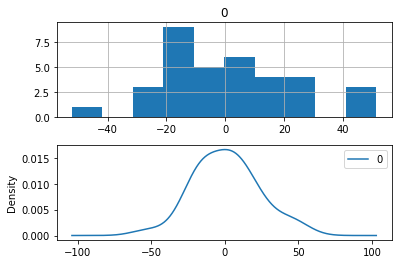

In [19]:
# summarize residual errors for an ARIMA model
# prepare data
X = series.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
	# predict
	model = ARIMA(history, order=(2,1,0))
	model_fit = model.fit()
	yhat = model_fit.forecast()[0]
	predictions.append(yhat)
	# observation
	obs = test[i]
	history.append(obs)
# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)
# errors
residuals = [test[i]-predictions[i] for i in range(len(test))]
residuals = pd.DataFrame(residuals)
print(residuals.describe())
pyplot.figure()
pyplot.subplot(211)
residuals.hist(ax=pyplot.gca())
pyplot.subplot(212)
residuals.plot(kind='kde', ax=pyplot.gca())
pyplot.show()

### Performing bias-correction

In [25]:
# load data
series = pd.read_csv('dataset.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
# prepare data
X = series.values
X = X.astype('float32')
# fit model
model = ARIMA(X, order=(2,1,0))
model_fit = model.fit()
bias = 1.081623
# save model
model_fit.save('model.pkl')
numpy.save('model_bias.npy', [bias])

In [27]:
# load finalized model and make a prediction
model_fit = ARIMAResults.load('model.pkl')
bias = numpy.load('model_bias.npy')
yhat = bias + float(model_fit.forecast()[0])
print('Predicted: %.3f' % yhat)

Predicted: 540.011


>Predicted=540.011, Expected=568
>Predicted=571.593, Expected=575
>Predicted=573.292, Expected=579
>Predicted=579.562, Expected=587
>Predicted=588.064, Expected=602
>Predicted=603.025, Expected=594
>Predicted=593.177, Expected=587
>Predicted=588.556, Expected=587
>Predicted=588.796, Expected=625
>Predicted=627.947, Expected=613
RMSE: 16.533


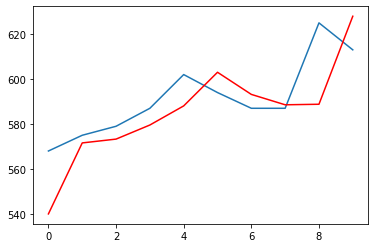

In [30]:
# load and evaluate the finalized model on the validation dataset
# load and prepare datasets
X = dataset.values.astype('float32')
history = [x for x in X]
validation = pd.read_csv('validation.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
y = validation.values.astype('float32')
# load model
model_fit = ARIMAResults.load('model.pkl')
bias = numpy.load('model_bias.npy')
# make first prediction
predictions = list()
yhat = bias + float(model_fit.forecast()[0])
predictions.append(yhat)
history.append(y[0])
print('>Predicted=%.3f, Expected=%3.f' % (yhat, y[0]))
# rolling forecasts
for i in range(1, len(y)):
	# predict
	model = ARIMA(history, order=(2,1,0))
	model_fit = model.fit()
	yhat = bias + float(model_fit.forecast()[0])
	predictions.append(yhat)
	# observation
	obs = y[i]
	history.append(obs)
	print('>Predicted=%.3f, Expected=%3.f' % (yhat, obs))
# report performance
rmse = sqrt(mean_squared_error(y, predictions))
print('RMSE: %.3f' % rmse)
pyplot.plot(y)
pyplot.plot(predictions, color='red')
pyplot.show()